<a href="https://colab.research.google.com/github/Nkosingiphile18/CodSoft-Internship/blob/main/Titanic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic dataset analysis**

In [ ]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()
fileName = list(uploaded.keys())[0]

# Read file
data = pd.read_csv(fileName)

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


**Displaying the first few rows of the Dataframe**

In [ ]:
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
data_cleaned = data.dropna()
print(data_cleaned)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [ ]:
#Remove dimensions that do not influence the dependent variable
data_cleaned = data_cleaned.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
print(data_cleaned)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1           1       1  female  38.0      1      0  71.2833        C
3           1       1  female  35.0      1      0  53.1000        S
6           0       1    male  54.0      0      0  51.8625        S
10          1       3  female   4.0      1      1  16.7000        S
11          1       1  female  58.0      0      0  26.5500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
871         1       1  female  47.0      1      1  52.5542        S
872         0       1    male  33.0      0      0   5.0000        S
879         1       1  female  56.0      0      1  83.1583        C
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C

[183 rows x 8 columns]


In [ ]:
# Create dummy variables for categorical variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['Sex', 'Embarked'])
data_cleaned = data_cleaned.astype(int)
print(data_cleaned)

     Survived  Pclass  Age  SibSp  Parch  Fare  Sex_female  Sex_male  \
1           1       1   38      1      0    71           1         0   
3           1       1   35      1      0    53           1         0   
6           0       1   54      0      0    51           0         1   
10          1       3    4      1      1    16           1         0   
11          1       1   58      0      0    26           1         0   
..        ...     ...  ...    ...    ...   ...         ...       ...   
871         1       1   47      1      1    52           1         0   
872         0       1   33      0      0     5           0         1   
879         1       1   56      0      1    83           1         0   
887         1       1   19      0      0    30           1         0   
889         1       1   26      0      0    30           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
1             1           0           0  
3             0           0           1  
6        

**Split the data into train and test datasets**

In [ ]:
train = data_cleaned.sample(frac=0.8, random_state=42)
train
test = data_cleaned.drop(train.index)
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
3,1,1,35,1,0,53,1,0,0,0,1
92,0,1,46,1,0,61,0,1,0,0,1
123,1,2,32,0,0,13,1,0,0,0,1
124,0,1,54,0,1,77,0,1,0,0,1
218,1,1,32,0,0,76,1,0,1,0,0
269,1,1,35,0,0,135,1,0,0,0,1
275,1,1,63,1,0,77,1,0,0,0,1
292,0,2,36,0,0,12,0,1,1,0,0
299,1,1,50,0,1,247,1,0,1,0,0
309,1,1,30,0,0,56,1,0,1,0,0


**EXPLORATORY DATA ANALYSIS**

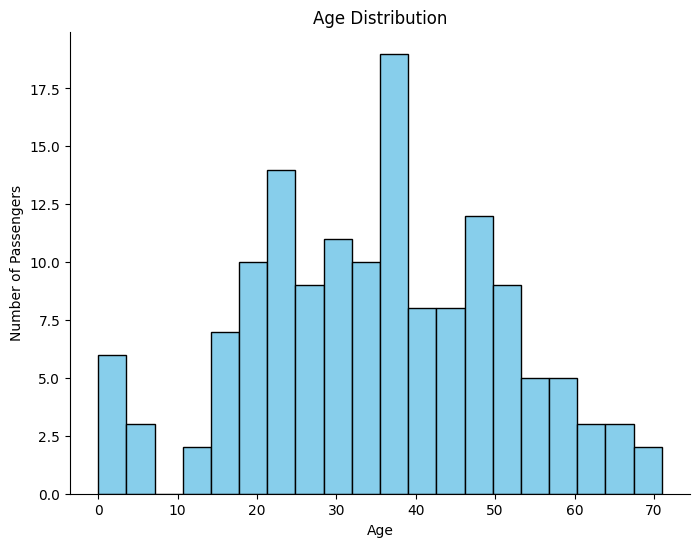

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

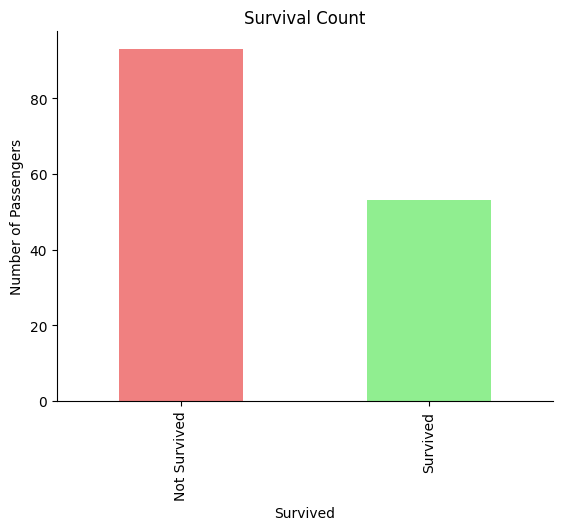

In [ ]:
from matplotlib import pyplot as plt
survived_count = train['Survived'].value_counts()
survived_count.plot(kind='bar', color=['lightcoral', 'lightgreen'], title='Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

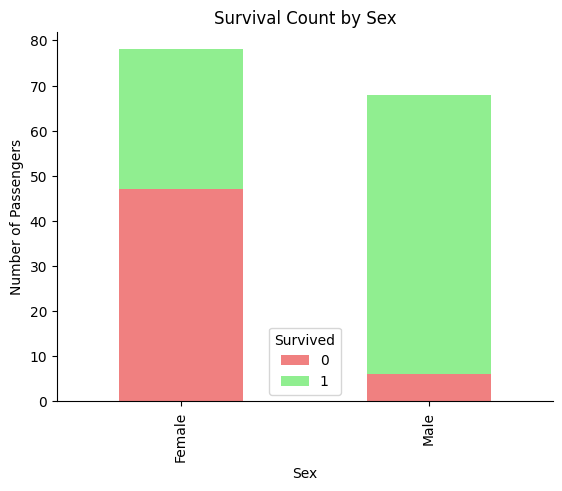

In [ ]:
from matplotlib import pyplot as plt
survival_sex_counts = train.groupby(['Sex_female', 'Sex_male', 'Survived']).size().unstack()
survival_sex_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], title='Survival Count by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

**Correlation of the variables on unstandardized dataset**

In [ ]:
correlation_matrix = train.corr()
print(correlation_matrix)

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.029525 -0.331124  0.165951  0.065683  0.151457   
Pclass     -0.029525  1.000000 -0.333790 -0.099385  0.039186 -0.320700   
Age        -0.331124 -0.333790  1.000000 -0.176727 -0.306303 -0.097402   
SibSp       0.165951 -0.099385 -0.176727  1.000000  0.246079  0.268273   
Parch       0.065683  0.039186 -0.306303  0.246079  1.000000  0.387162   
Fare        0.151457 -0.320700 -0.097402  0.268273  0.387162  1.000000   
Sex_female  0.533535  0.026354 -0.228303  0.127982  0.134130  0.091719   
Sex_male   -0.533535 -0.026354  0.228303 -0.127982 -0.134130 -0.091719   
Embarked_C  0.134853 -0.254413  0.083329 -0.055795 -0.102410  0.246737   
Embarked_Q -0.033573 -0.045238  0.026763  0.183076 -0.078823  0.015458   
Embarked_S -0.125583  0.263171 -0.089085  0.011063  0.120587 -0.248362   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.533535 -0.533535    0.13

**Standardizing the dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Survived'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict class labels based on 0.5 threshold
y_pred = (model.predict_proba(X_test_scaled)[:, 1] >= 0.5).astype(int)
print("Predictions: ",y_pred[:10])

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusion)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)

# Display Logistic regression model using statsmodels
X = sm.add_constant(X_train_scaled)
model = sm.Logit(y_train, X)
results = model.fit()
print(results.summary())

Predictions:  [1 0 1 0 1 1 1 0 1 1]
Accuracy:  0.7837837837837838
Confusion Matrix: 
 [[ 5  2]
 [ 6 24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.92      0.80      0.86        30

    accuracy                           0.78        37
   macro avg       0.69      0.76      0.71        37
weighted avg       0.83      0.78      0.80        37

         Current function value: 0.434672
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  146
Model:                          Logit   Df Residuals:                      137
Method:                           MLE   Df Model:                            8
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.3365
Time:                        18:56:13   Log-Likelihood:                -63.462
con

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
